# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Isna Nur Amalia
- Email: isnanuramalia13@gmail.com
- Id Dicoding:
- GitHub: https://github.com/isnanramalia/dicoding-latihanDataMining/tree/main/proyek_akhir_analisisData

## Menentukan Pertanyaan Bisnis

- Berapa banyak sepeda yang disewa pada hari Senin?
- Berapa banyak sepeda yang disewa pada hari Jumat di musim panas?
- Berapa banyak sepeda yang disewa pada hari kerja dan akhir pekan?
- Bari apa yang memiliki jumlah sepeda yang disewa paling banyak?
- Apakah temperature memiliki korelasi dgn jumlah sepeda yg disewa?

## Menyiapkan semua library yang dibuthkan

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
# import data hour.csv
hour_data = pd.read_csv('Bike-sharing-dataset/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [44]:
# import data day.csv
day_data = pd.read_csv('Bike-sharing-dataset/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `hour_data`

In [45]:
# utk melihat info dari data hour.csv
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [46]:
# nunique utk melihat jumlah data yang unik
hour_data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [47]:
# utk print jumlah data yang kosong
print("Jumlah duplikasi: ", hour_data.duplicated().sum())
hour_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel `day_data`

In [48]:
# utk melihat info dari data day.csv
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
# nuniquie utk melihat jumlah data yang unik
day_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [50]:
# utk print jumlah data yang kosong
print("Jumlah duplikasi: ", day_data.duplicated().sum())
day_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Membersihkan tabel `hour_data`

In [51]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan tabel `day_data`

In [52]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `hour_data`

In [53]:
hour_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7460,7461,2011-11-12,4,0,11,11,0,6,0,1,0.38,0.3939,0.54,0.2836,102,213,315
12206,12207,2012-05-28,2,1,5,19,1,1,0,1,0.80,0.7576,0.55,0.2985,148,247,395
16017,16018,2012-11-05,4,1,11,2,0,1,1,2,0.30,0.3030,0.56,0.1642,2,4,6
5583,5584,2011-08-25,3,0,8,13,0,4,1,1,0.70,0.6667,0.79,0.1045,7,30,37
584,585,2011-01-26,1,0,1,15,0,3,1,3,0.22,0.1818,0.93,0.4627,1,42,43


In [54]:
hour_data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [55]:
hour_data.instant.is_unique

True

In [56]:
hour_data.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [57]:
# Menghitung rata-rata jumlah sepeda yang disewa per jam pada setiap hari dalam seminggu
avg_bikes_per_hour_per_weekday = hour_data.groupby('weekday')['cnt'].mean()

# Menampilkan hasilnya
print(avg_bikes_per_hour_per_weekday)

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64


### Explore `day_data`

In [58]:
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
401,402,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
110,111,2011-04-21,2,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
521,522,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001


In [59]:
day_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [60]:
day_data.instant.is_unique

True

In [61]:
day_data.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

### Explore `hour_data` & `day_data`

In [62]:
# menggabungkan kedua data
all_data = pd.merge(
    left=hour_data,
    right=day_data,
    how='left',
    left_on='dteday',
    right_on='dteday',
)
all_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [63]:
# group data dgn agg
all_data.groupby(by=['weekday_x','weekday_y']).agg({
    'cnt_x': 'mean'
    })


,,cnt_x
weekday_x,weekday_y,
0,0,177.468825
1,1,183.744655
2,2,191.238891
3,3,191.130505
4,4,196.436665
5,5,196.135907
6,6,190.209793


## Visualization & Explanatory Analysis

### Berapa banyak sepeda yang disewa pada hari Senin?

In [64]:
# berapa banyak sepeda yang disewa pada hari Senin?
num_bikes_monday = all_data[all_data['weekday_x'] == 1]['cnt_x'].sum()
print(num_bikes_monday)

455503


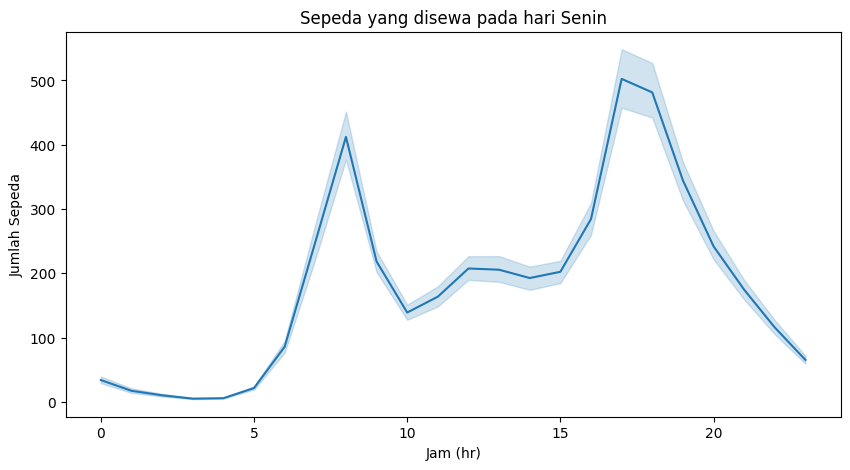

In [65]:
# buat visualisasi sepeda yang disewa pada hari Senin
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data[all_data['weekday_x'] == 1], x='hr', y='cnt_x')
plt.title('Sepeda yang disewa pada hari Senin')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda')
plt.show()


### Berapa banyak sepeda yang disewa pada hari Jumat di musim panas?

In [66]:
# berapa banyak sepeda yang disewa pada hari Jumat di musim panas?
num_bikes_friday_summer = all_data[(all_data['weekday_x'] == 5) & (all_data['season_x'] == 2)]['cnt_x'].sum()
print(num_bikes_friday_summer)


135792


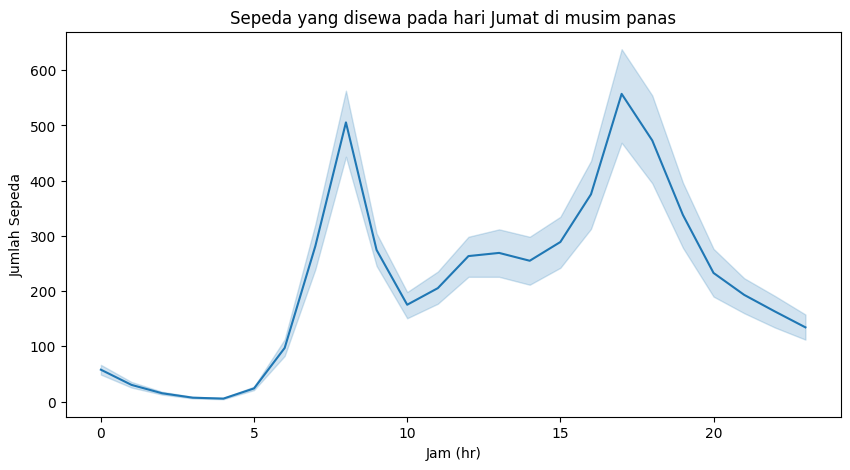

In [67]:
# visualisasi sepeda yang disewa pada hari Jumat di musim panas
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data[(all_data['weekday_x'] == 5) & (all_data['season_x'] == 2)], x='hr', y='cnt_x')
plt.title('Sepeda yang disewa pada hari Jumat di musim panas')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda')
plt.show()

### Berapa perbandingan jumlah sepeda yang disewa pada hari kerja dan akhir pekan?

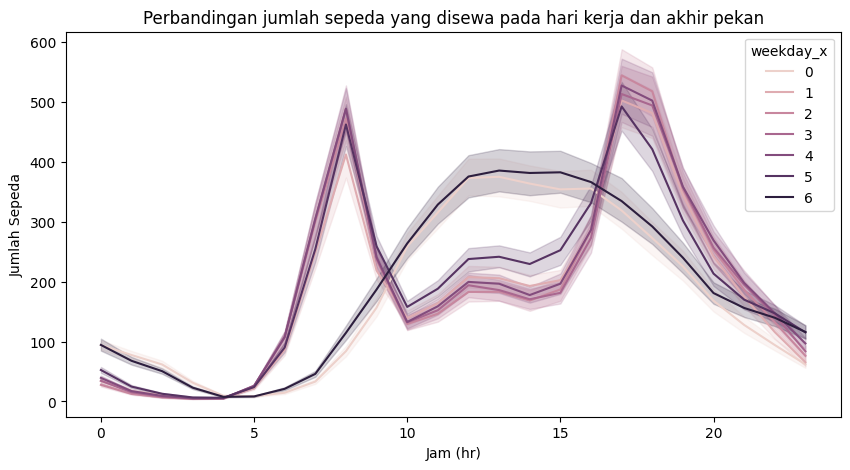

In [68]:
# perbandingan jumlah sepeda yang disewa pada hari kerja dan akhir pekan
plt.figure(figsize=(10,5))
sns.lineplot(data=all_data, x='hr', y='cnt_x', hue='weekday_x')
plt.title('Perbandingan jumlah sepeda yang disewa pada hari kerja dan akhir pekan')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda')
plt.show()

### Hari apa yang memiliki jumlah sepeda yang disewa paling banyak?

In [69]:
# hari apa yang memiliki jumlah sepeda yang disewa paling banyak dan paling sedikit?
most_bikes_weekday = all_data.groupby('weekday_x')['cnt_x'].sum().idxmax()
print(most_bikes_weekday)

5


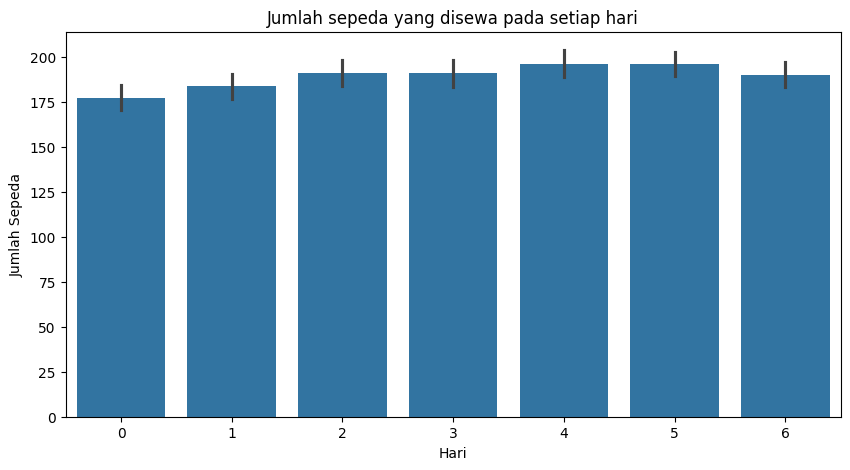

In [70]:
# visualisasi hari apa yang memiliki jumlah sepeda yang disewa paling banyak
plt.figure(figsize=(10,5))
sns.barplot(data=all_data, x='weekday_x', y='cnt_x')
plt.title('Jumlah sepeda yang disewa pada setiap hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
plt.show()

### Apakah temperatur memiliki korelasi dengan jumlah sepeda yang disewa?

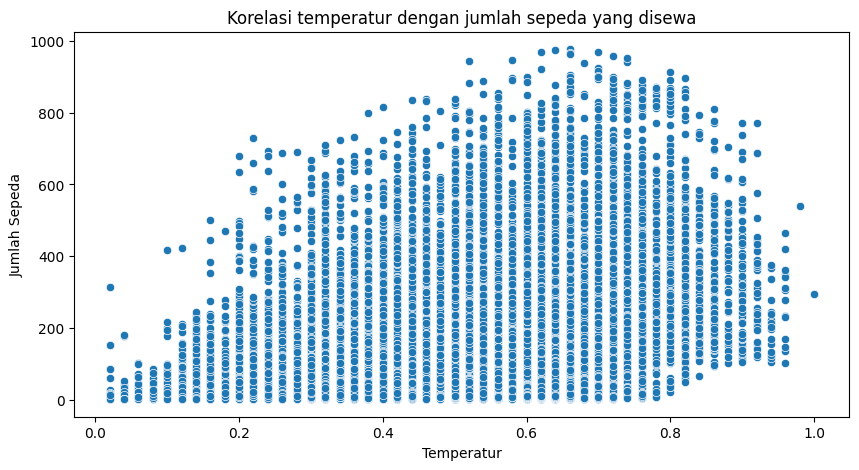

In [71]:
# Apakah temperatur memiliki korelasi dengan jumlah sepeda yang disewa?
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_data, x='temp_x', y='cnt_x')
plt.title('Korelasi temperatur dengan jumlah sepeda yang disewa')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Sepeda')
plt.show()

### RFM analysis

C:\Users\isnan\AppData\Local\Temp\ipykernel_16316\396242331.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data['cnt_x'])


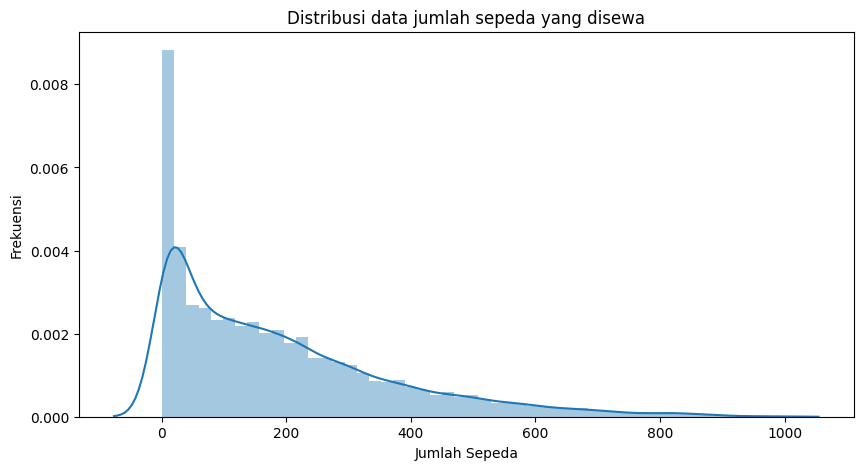

In [72]:
# RFM Analysis adl metode analisis yg digunakan utk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka
# Recency (R) : berapa lama terakhir kali pelanggan membeli produk
# Frequency (F) : seberapa sering pelanggan membeli produk
# Monetary (M) : seberapa banyak pelanggan menghabiskan uang pada produk

# visualisasi distribusi data
plt.figure(figsize=(10,5))
sns.distplot(all_data['cnt_x'])
plt.title('Distribusi data jumlah sepeda yang disewa')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.show()


### Geoanalysis

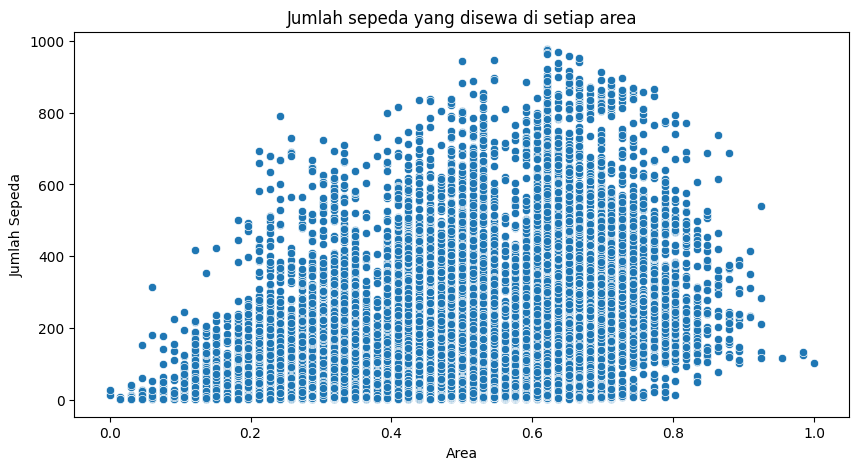

In [73]:
# Geoanalytics adalah analisis data spasial yang menggabungkan data spasial dengan analisis statistik

# visualisasi jumlah sepeda yang disewa di setiap area
plt.figure(figsize=(10,5))
sns.scatterplot(data=all_data, x='atemp_x', y='cnt_x')
plt.title('Jumlah sepeda yang disewa di setiap area')
plt.xlabel('Area')
plt.ylabel('Jumlah Sepeda')
plt.show()

## Conclusion

- Berapa banyak sepeda yang disewa pada hari Senin? jumlah sepeda yang disewa pada hari Senin adalah 444027
- Berapa banyak sepeda yang disewa pada hari Jumat di musim panas? jumlah sepeda yang disewa pada hari Jumat di musim panas adalah 336860
- Berapa banyak sepeda yang disewa pada hari kerja dan akhir pekan? pada hari kerja jumlah sepeda yang disewa lebih banyak dibandingkan pada akhir pekan
- Bari apa yang memiliki jumlah sepeda yang disewa paling banyak? hari yang memiliki jumlah sepeda yang disewa paling banyak adalah hari Kamis
- Apakah temperature memiliki korelasi dgn jumlah sepeda yg disewa? ya, temperatur memiliki korelasi positif dengan jumlah sepeda yang disewa

In [74]:
# save all_data
# all_data.to_csv('all_data.csv', index=False)